In [1]:
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [79]:
def _draw(n_vertex=12, n_neighbor=3, gap=0, start_vertex=None, end_vertex=None, color='b', lw=2):
    vertices = [[np.cos(i * 2 * math.pi / n_vertex), np.sin(i * 2 * math.pi / n_vertex)] for i in range(n_vertex)]
    plt.plot([vertices[i][0] for i in range(n_vertex)], [vertices[i][1] for i in range(n_vertex)], f'{color}o', markersize=2*lw)

    edges = [[i, (i + 1) % n_vertex] for i in range(n_vertex)]
    for edge in edges:
        plt.plot([vertices[edge[0]][0], vertices[edge[1]][0]], [vertices[edge[0]][1], vertices[edge[1]][1]], f'{color}-', lw=lw)

    start_vertex = 0 if start_vertex is None else start_vertex
    end_vertex = n_vertex if end_vertex is None else end_vertex
    for i in range(start_vertex, end_vertex):
        for j in range(2 + gap, n_neighbor + gap + 2):
            plt.plot([vertices[i%n_vertex][0], vertices[(i + j) % n_vertex][0]], [vertices[i%n_vertex][1], vertices[(i + j) % n_vertex][1]], f'{color}-', lw=lw)
    plt.axis('equal')

def draw(n_vertex=12, n_neighbor=3):
    for span in range(3):
        lst_gaps = list(range(max(3, n_vertex // 2 - n_neighbor)))
        lst_gaps = lst_gaps + lst_gaps[::-1][1:-1]
        for gap in lst_gaps:
            for sv in range(n_vertex):
                _draw(n_vertex, n_neighbor, gap, sv, sv+span+3+n_vertex//2, color='b', lw=2)
                display.display(plt.gcf())
                display.clear_output(wait=True)
#                 time.sleep(0.05)
                plt.clf()

In [80]:
draw(24, 2)

<Figure size 640x480 with 0 Axes>

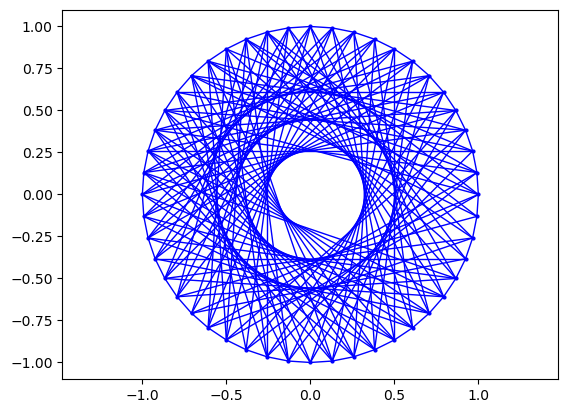

In [81]:
def _draw2(n_vertex=24, start_vertex=0, color='b', lw=1):
    assert n_vertex % 2 == 0
    vertices = [[np.cos(i * 2 * math.pi / n_vertex), np.sin(i * 2 * math.pi / n_vertex)] for i in range(n_vertex)]
    plt.plot([vertices[i][0] for i in range(n_vertex)], [vertices[i][1] for i in range(n_vertex)], f'{color}o', markersize=2*lw)

    edges = [[i, (i + 1) % n_vertex] for i in range(n_vertex)]
    for edge in edges:
        plt.plot([vertices[edge[0]][0], vertices[edge[1]][0]], [vertices[edge[0]][1], vertices[edge[1]][1]], f'{color}-', lw=lw)

    start_vertex = 0 if start_vertex is None else start_vertex
    for idx, i in enumerate(range(start_vertex, start_vertex + int(n_vertex / 0.4))):
        plt.plot([vertices[i % n_vertex][0], vertices[(i + (idx // 16) + 14) % n_vertex][0]], [vertices[i % n_vertex][1], vertices[(i + (idx // 16) + 14) % n_vertex][1]], f'{color}-', lw=lw)
        # plt.plot([vertices[i % n_vertex][0], vertices[(i - (idx // 16) - 14 + n_vertex) % n_vertex][0]], [vertices[i % n_vertex][1], vertices[(i - (idx // 16) - 14 + n_vertex) % n_vertex][1]], f'{color}-', lw=lw)
    plt.axis('equal')

_draw2(48, 0, color='b', lw=1)
# for i in range(48):
#     _draw2(48, i, color='b', lw=1)
#     display.display(plt.gcf())
#     display.clear_output(wait=True)
#     plt.clf()

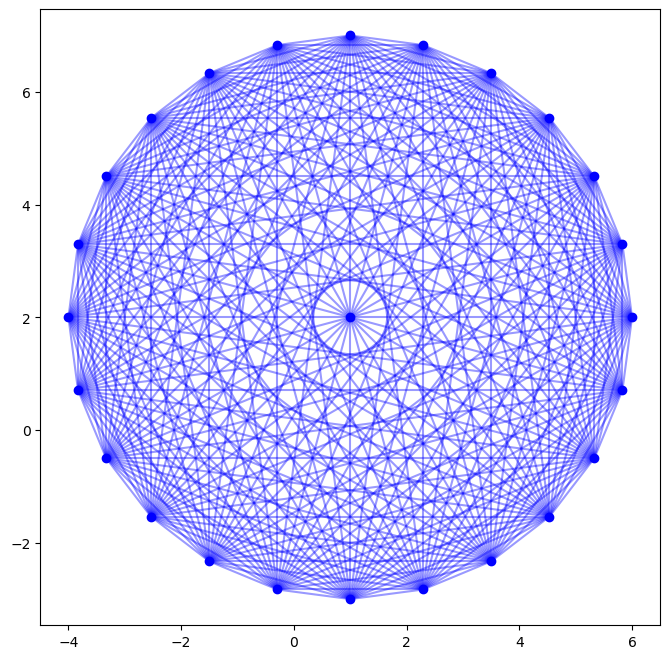

In [70]:
import itertools

def draw_all_edges(num_vertices=48, center=(1, 2), radius=5):
    angles = np.linspace(0, 2 * np.pi, num_vertices, endpoint=False)
    x = center[0] + radius * np.cos(angles)
    y = center[1] + radius * np.sin(angles)
    
    plt.figure(figsize=(8, 8))
    for i, j in itertools.combinations(range(num_vertices), 2):
        plt.plot([x[i], x[j]], [y[i], y[j]], 'b-', alpha=0.4)
    
    plt.scatter(x, y, color='b')
    plt.plot(center[0], center[1], 'bo')
    plt.axis('equal')
    plt.show()

draw_all_edges(num_vertices=24, center=(1, 2), radius=5)

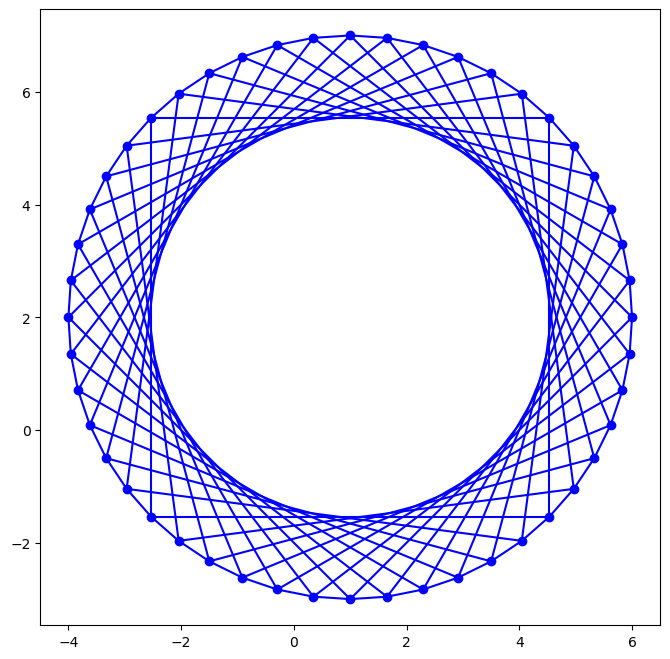

In [76]:
def draw_polygon_inside_circle(num_vertices=48, center=(1, 2), radius=5, step=4):
    angles = np.linspace(0, 2 * np.pi, num_vertices, endpoint=False)
    x = center[0] + radius * np.cos(angles)
    y = center[1] + radius * np.sin(angles)
    
    plt.figure(figsize=(8, 8))
    edges = [[i, (i + 1) % num_vertices] for i in range(num_vertices)]
    for edge in edges:
        plt.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], f'b-')
    
    for i in range(num_vertices):
        plt.plot([x[i], x[(i + step) % num_vertices]], [y[i], y[(i + step) % num_vertices]], 'b-')
    
    plt.scatter(x, y, color='b')
    plt.axis('equal')
    plt.show()

draw_polygon_inside_circle(num_vertices=48, center=(1, 2), radius=5, step=12)